## Bundesliga bet predictor

In [1]:
import requests
import json
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from IPython.display import display
%matplotlib inline

In [2]:
# Table on season 2021/2022
link = 'https://www.openligadb.de/api/getbltable/bl1/2021'
response = requests.get(link)
t_2021 = response.json()

In [3]:
# should be 18 teams per season
df = pd.DataFrame(t_2021)

In [4]:
df.dtypes

TeamInfoId        int64
TeamName         object
ShortName        object
TeamIconUrl      object
Points            int64
OpponentGoals     int64
Goals             int64
Matches           int64
Won               int64
Lost              int64
Draw              int64
GoalDiff          int64
dtype: object

In [5]:
df = df.drop(['ShortName', 'TeamIconUrl'], axis = 1)
df = df.rename(columns={ "TeamInfoId": "team_id", "TeamName": "team_name", "Points": "points", "OpponentGoals": "opponent_goals", "Goals": "goals", "Matches": "matches", "Won": "won_games", "Lost": "lost_games", "Draw": "draw", "GoalDiff": "goal_diff"})
df.head(18)

,team_id,team_name,points,opponent_goals,goals,matches,won_games,lost_games,draw,goal_diff
0,40,FC Bayern München,77,37,97,34,24,5,5,60
1,7,Borussia Dortmund,69,52,85,34,22,9,3,33
2,6,Bayer Leverkusen,64,47,80,34,19,8,7,33
3,1635,RB Leipzig,58,37,72,34,17,10,7,35
4,80,1. FC Union Berlin,57,44,50,34,16,9,9,6
5,112,SC Freiburg,55,46,58,34,15,9,10,12
6,65,1. FC Köln,52,49,52,34,14,10,10,3
7,81,1. FSV Mainz 05,46,45,50,34,13,14,7,5
8,175,TSG 1899 Hoffenheim,46,60,58,34,13,14,7,-2
9,87,Borussia Mönchengladbach,45,61,54,34,12,13,9,-7


In [6]:
df.insert(10, 'season', link[-4:])

In [7]:
link2 = 'https://www.openligadb.de/api/getbltable/bl1/2020'
link3 = 'https://www.openligadb.de/api/getbltable/bl1/2019'
link4 = 'https://www.openligadb.de/api/getbltable/bl1/2018'
link5 = 'https://www.openligadb.de/api/getbltable/bl1/2017'
link6 = 'https://www.openligadb.de/api/getbltable/bl1/2016'
link7 = 'https://www.openligadb.de/api/getbltable/bl1/2015'
link8 = 'https://www.openligadb.de/api/getbltable/bl1/2014'
link9 = 'https://www.openligadb.de/api/getbltable/bl1/2013'
link10 = 'https://www.openligadb.de/api/getbltable/bl1/2012'

In [8]:
def clean1 (link):
    response = requests.get(link)
    t = response.json()
    df = pd.DataFrame(t)

    df = df.drop(['ShortName', 'TeamIconUrl'], axis = 1)
    df = df.rename(columns={ "TeamInfoId": "team_id", "TeamName": "team_name", "Points": "points", "OpponentGoals": "opponent_goals", "Goals": "goals", "Matches": "matches", "Won": "won_games", "Lost": "lost_games", "Draw": "draw", "GoalDiff": "goal_diff"})
    df.insert(10, 'season', link[-4:])

    return df
    

In [9]:
df2 = clean1 (link2)
df3 = clean1 (link3)
df4 = clean1 (link4)
df5 = clean1 (link5)
df6 = clean1 (link6)
df7 = clean1 (link7)
df8 = clean1 (link8)
df9 = clean1 (link9)
df10 = clean1 (link10)

In [10]:
df_t = pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9, df10])

In [11]:
df_t.dtypes

team_id            int64
team_name         object
points             int64
opponent_goals     int64
goals              int64
matches            int64
won_games          int64
lost_games         int64
draw               int64
goal_diff          int64
season            object
dtype: object

In [12]:
df_t = df_t.drop_duplicates(subset=['team_id'], keep='first')


In [13]:
df_t.reset_index()

,index,team_id,team_name,points,opponent_goals,goals,matches,won_games,lost_games,draw,goal_diff,season
0,0,40,FC Bayern München,77,37,97,34,24,5,5,60,2021
1,1,7,Borussia Dortmund,69,52,85,34,22,9,3,33,2021
2,2,6,Bayer Leverkusen,64,47,80,34,19,8,7,33,2021
3,3,1635,RB Leipzig,58,37,72,34,17,10,7,35,2021
4,4,80,1. FC Union Berlin,57,44,50,34,16,9,9,6,2021
5,5,112,SC Freiburg,55,46,58,34,15,9,10,12,2021
6,6,65,1. FC Köln,52,49,52,34,14,10,10,3,2021
7,7,81,1. FSV Mainz 05,46,45,50,34,13,14,7,5,2021
8,8,175,TSG 1899 Hoffenheim,46,60,58,34,13,14,7,-2,2021
9,9,87,Borussia Mönchengladbach,45,61,54,34,12,13,9,-7,2021


In [14]:
df_t.team_id.unique()

array([  40,    7,    6, 1635,   80,  112,   65,   81,  175,   87,   91,
        131,  129,   95,   16,   54,   83,  115,  134,    9,  185,   31,
         55,   79,  100,  171,  118,  123,   74], dtype=int64)

In [15]:
# All game results season 2021/2022

link_r = 'https://www.openligadb.de/api/getmatchdata/bl1/2021'
response = requests.get(link_r)
r_2021 = response.json()

In [16]:
# should be 306 games (=rows) for each season | (18 teams = (17 + 17) * 9)
data = pd.DataFrame(r_2021)
data.tail()

,MatchID,MatchDateTime,TimeZoneID,LeagueId,LeagueName,MatchDateTimeUTC,Group,Team1,Team2,LastUpdateDateTime,MatchIsFinished,MatchResults,Goals,Location,NumberOfViewers
301,61146,2022-05-14T15:30:00,W. Europe Standard Time,4500,1. Fußball-Bundesliga 2021/2022,2022-05-14T13:30:00Z,"{'GroupName': '34. Spieltag', 'GroupOrderID': ...","{'TeamId': 87, 'TeamName': 'Borussia Mönchengl...","{'TeamId': 175, 'TeamName': 'TSG 1899 Hoffenhe...",2022-05-14T17:23:38.417,True,"[{'ResultID': 98141, 'ResultName': 'Endergebni...","[{'GoalID': 94449, 'ScoreTeam1': 0, 'ScoreTeam...",None,NaN
302,61147,2022-05-14T15:30:00,W. Europe Standard Time,4500,1. Fußball-Bundesliga 2021/2022,2022-05-14T13:30:00Z,"{'GroupName': '34. Spieltag', 'GroupOrderID': ...","{'TeamId': 81, 'TeamName': '1. FSV Mainz 05', ...","{'TeamId': 91, 'TeamName': 'Eintracht Frankfur...",2022-05-14T17:31:21.193,True,"[{'ResultID': 98143, 'ResultName': 'Endergebni...","[{'GoalID': 94452, 'ScoreTeam1': 1, 'ScoreTeam...",None,NaN
303,61148,2022-05-14T15:30:00,W. Europe Standard Time,4500,1. Fußball-Bundesliga 2021/2022,2022-05-14T13:30:00Z,"{'GroupName': '34. Spieltag', 'GroupOrderID': ...","{'TeamId': 16, 'TeamName': 'VfB Stuttgart', 'S...","{'TeamId': 65, 'TeamName': '1. FC Köln', 'Shor...",2022-05-14T17:31:24.007,True,"[{'ResultID': 98137, 'ResultName': 'Endergebni...","[{'GoalID': 94453, 'ScoreTeam1': 1, 'ScoreTeam...",None,NaN
304,61149,2022-05-14T15:30:00,W. Europe Standard Time,4500,1. Fußball-Bundesliga 2021/2022,2022-05-14T13:30:00Z,"{'GroupName': '34. Spieltag', 'GroupOrderID': ...","{'TeamId': 80, 'TeamName': '1. FC Union Berlin...","{'TeamId': 129, 'TeamName': 'VfL Bochum', 'Sho...",2022-05-14T17:31:26.883,True,"[{'ResultID': 98131, 'ResultName': 'Endergebni...","[{'GoalID': 94450, 'ScoreTeam1': 1, 'ScoreTeam...",None,NaN
305,61150,2022-05-14T15:30:00,W. Europe Standard Time,4500,1. Fußball-Bundesliga 2021/2022,2022-05-14T13:30:00Z,"{'GroupName': '34. Spieltag', 'GroupOrderID': ...","{'TeamId': 131, 'TeamName': 'VfL Wolfsburg', '...","{'TeamId': 40, 'TeamName': 'FC Bayern München'...",2022-05-14T17:31:33.82,True,"[{'ResultID': 98145, 'ResultName': 'Endergebni...","[{'GoalID': 94455, 'ScoreTeam1': 0, 'ScoreTeam...",None,NaN


In [17]:
# get new columns from columns with a dictionary
def flatten(data, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(data[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        data = pd.concat([data, flattened], axis=1)
        data = data.drop(column, axis=1)
    return data

In [18]:
# unpack dicts
pd.set_option("display.max_columns", 0)

nested_columns = ['Group', 'Team1', 'Team2', 'MatchResults']
flat = flatten(data, nested_columns)

nested_columns2 = ['MatchResults_0', 'MatchResults_1']
flat2 = flatten(flat, nested_columns2)


In [19]:
# drop ueselss bs
s_2021 = flat2.drop(['TimeZoneID', 'LeagueId', 'LeagueName', 'MatchDateTimeUTC', 'LastUpdateDateTime', 'MatchIsFinished', 'Goals', 'Location', 'NumberOfViewers', 'Group_GroupName', 'Group_GroupID', 'Team1_ShortName', 'Team1_TeamIconUrl', 'Team1_TeamGroupName', 'Team1_ShortName', 	'Team1_TeamIconUrl', 'Team1_TeamGroupName', 'MatchResults_0_ResultOrderID', 'MatchResults_0_ResultTypeID', 'MatchResults_0_ResultDescription', 'MatchResults_1_ResultID', 'MatchResults_1_ResultOrderID', 'MatchResults_1_ResultTypeID', 'MatchResults_1_ResultDescription', 'Team2_ShortName', 'Team2_TeamIconUrl', 'Team2_TeamGroupName', 'MatchResults_0_ResultID', 'MatchResults_0_ResultName', 'MatchResults_1_ResultName'], axis = 1)

In [20]:
# check data types of the columns
s_2021.dtypes

MatchID                        int64
MatchDateTime                 object
Group_GroupOrderID            object
Team1_TeamId                  object
Team1_TeamName                object
Team2_TeamId                  object
Team2_TeamName                object
MatchResults_0_PointsTeam1    object
MatchResults_0_PointsTeam2    object
MatchResults_1_PointsTeam1    object
MatchResults_1_PointsTeam2    object
dtype: object

In [21]:
# change date column to weekday: 4=friday, 5=saturday, 6=sunday (most common days!)
s_2021['MatchDateTime'] = pd.to_datetime(s_2021['MatchDateTime'])
s_2021['MatchDateTime'] = s_2021['MatchDateTime'].dt.dayofweek

In [22]:
# change to numeric column if sensful
s_2021['MatchID'] = s_2021['MatchID'].astype(int)
s_2021['Group_GroupOrderID'] = s_2021['Group_GroupOrderID'].astype(int)
s_2021['Team1_TeamId'] = s_2021['Team1_TeamId'].astype(int)
s_2021['Team2_TeamId'] = s_2021['Team2_TeamId'].astype(int)
s_2021['MatchResults_0_PointsTeam1'] = s_2021['MatchResults_0_PointsTeam1'].astype(int)
s_2021['MatchResults_0_PointsTeam2'] = s_2021['MatchResults_0_PointsTeam2'].astype(int)
s_2021['MatchResults_1_PointsTeam1'] = s_2021['MatchResults_1_PointsTeam1'].astype(int)
s_2021['MatchResults_1_PointsTeam2'] = s_2021['MatchResults_1_PointsTeam2'].astype(int)

In [23]:
# rename columns and lower them in this step too
s = s_2021.rename(columns={ "MatchID": "match_id", "MatchDateTime": "weekday", "Group_GroupOrderID": "gameday", "Team1_TeamId": "team1_id", "Team2_TeamId": "team2_id", "Team1_TeamName": "team1_name", "Team2_TeamName": "team2_name", "MatchResults_0_PointsTeam1": "2nd_ht_result_team1", "MatchResults_0_PointsTeam2": "2nd_ht_result_team2", "MatchResults_1_PointsTeam1": "1st_ht_result_team1", "MatchResults_1_PointsTeam2": "1st_ht_result_team2" })

In [24]:
s.insert(11, 'season', link_r[-4:])

In [25]:
# check result
s

,match_id,weekday,gameday,team1_id,team1_name,team2_id,team2_name,2nd_ht_result_team1,2nd_ht_result_team2,1st_ht_result_team1,1st_ht_result_team2,season
0,60845,4,1,87,Borussia Mönchengladbach,40,FC Bayern München,1,1,1,1,2021
1,60846,5,1,83,Arminia Bielefeld,112,SC Freiburg,0,0,0,0,2021
2,60847,5,1,95,FC Augsburg,175,TSG 1899 Hoffenheim,0,4,0,1,2021
3,60851,5,1,16,VfB Stuttgart,115,SpVgg Greuther Fürth,5,1,2,0,2021
4,60852,5,1,80,1. FC Union Berlin,6,Bayer Leverkusen,1,1,1,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
301,61146,5,34,87,Borussia Mönchengladbach,175,TSG 1899 Hoffenheim,5,1,3,1,2021
302,61147,5,34,81,1. FSV Mainz 05,91,Eintracht Frankfurt,2,2,1,2,2021
303,61148,5,34,16,VfB Stuttgart,65,1. FC Köln,2,1,1,0,2021
304,61149,5,34,80,1. FC Union Berlin,129,VfL Bochum,3,2,2,0,2021


In [26]:
def clean_r (link_r):
    response = requests.get(link_r)
    r = response.json()
    data = pd.DataFrame(r)

    nested_columns = ['Group', 'Team1', 'Team2', 'MatchResults']
    flat = flatten(data, nested_columns)
    nested_columns2 = ['MatchResults_0', 'MatchResults_1']
    flat2 = flatten(flat, nested_columns2)

    s = flat2.drop(['TimeZoneID', 'LeagueId', 'LeagueName', 'MatchDateTimeUTC', 'LastUpdateDateTime', 'MatchIsFinished', 'Goals', 'Location', 'NumberOfViewers', 'Group_GroupName', 'Group_GroupID', 'Team1_ShortName', 'Team1_TeamIconUrl', 'Team1_TeamGroupName', 'Team1_ShortName', 	'Team1_TeamIconUrl', 'Team1_TeamGroupName', 'MatchResults_0_ResultOrderID', 'MatchResults_0_ResultTypeID', 'MatchResults_0_ResultDescription', 'MatchResults_1_ResultID', 'MatchResults_1_ResultOrderID', 'MatchResults_1_ResultTypeID', 'MatchResults_1_ResultDescription', 'Team2_ShortName', 'Team2_TeamIconUrl', 'Team2_TeamGroupName', 'MatchResults_0_ResultID', 'MatchResults_0_ResultName', 'MatchResults_1_ResultName'], axis = 1)

    s['MatchDateTime'] = pd.to_datetime(s['MatchDateTime'])
    s['MatchDateTime'] = s['MatchDateTime'].dt.dayofweek

    s['MatchID'] = s['MatchID'].astype(int)
    s['Group_GroupOrderID'] = s['Group_GroupOrderID'].astype(int)
    s['Team1_TeamId'] = s['Team1_TeamId'].astype(int)
    s['Team2_TeamId'] = s['Team2_TeamId'].astype(int)
    s['MatchResults_0_PointsTeam1'] = s['MatchResults_0_PointsTeam1'].astype(int)
    s['MatchResults_0_PointsTeam2'] = s['MatchResults_0_PointsTeam2'].astype(int)
    s['MatchResults_1_PointsTeam1'] = s['MatchResults_1_PointsTeam1'].astype(int)
    s['MatchResults_1_PointsTeam2'] = s['MatchResults_1_PointsTeam2'].astype(int)

    s = s.rename(columns={ "MatchID": "match_id", "MatchDateTime": "weekday", "Group_GroupOrderID": "gameday", "Team1_TeamId": "team1_id", "Team2_TeamId": "team2_id", "Team1_TeamName": "team1_name", "Team2_TeamName": "team2_name", "MatchResults_0_PointsTeam1": "2nd_ht_result_team1", "MatchResults_0_PointsTeam2": "2nd_ht_result_team2", "MatchResults_1_PointsTeam1": "1st_ht_result_team1", "MatchResults_1_PointsTeam2": "1st_ht_result_team2" })

    s.insert(11, 'season', link_r[-4:])
    
    return s

In [27]:
link_r2 = 'https://www.openligadb.de/api/getmatchdata/bl1/2020'
link_r3 = 'https://www.openligadb.de/api/getmatchdata/bl1/2019'
link_r4 = 'https://www.openligadb.de/api/getmatchdata/bl1/2018'
link_r5 = 'https://www.openligadb.de/api/getmatchdata/bl1/2017'
link_r6 = 'https://www.openligadb.de/api/getmatchdata/bl1/2016'
link_r7 = 'https://www.openligadb.de/api/getmatchdata/bl1/2015'
link_r8 = 'https://www.openligadb.de/api/getmatchdata/bl1/2014'
link_r9 = 'https://www.openligadb.de/api/getmatchdata/bl1/2013'
link_r10 = 'https://www.openligadb.de/api/getmatchdata/bl1/2012'

In [28]:
s2 = clean_r (link_r2)
s3 = clean_r (link_r3)
s4 = clean_r (link_r4)
s5 = clean_r (link_r5)
s6 = clean_r (link_r6)
s7 = clean_r (link_r7)
s8 = clean_r (link_r8)
s9 = clean_r (link_r9)
s10 = clean_r (link_r10)

In [29]:
df_r = pd.concat([s, s2, s3, s4, s5, s6, s7, s8, s9, s10])

In [30]:
df_r

,match_id,weekday,gameday,team1_id,team1_name,team2_id,team2_name,2nd_ht_result_team1,2nd_ht_result_team2,1st_ht_result_team1,1st_ht_result_team2,season
0,60845,4,1,87,Borussia Mönchengladbach,40,FC Bayern München,1,1,1,1,2021
1,60846,5,1,83,Arminia Bielefeld,112,SC Freiburg,0,0,0,0,2021
2,60847,5,1,95,FC Augsburg,175,TSG 1899 Hoffenheim,0,4,0,1,2021
3,60851,5,1,16,VfB Stuttgart,115,SpVgg Greuther Fürth,5,1,2,0,2021
4,60852,5,1,80,1. FC Union Berlin,6,Bayer Leverkusen,1,1,1,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
301,20247,5,34,91,Eintracht Frankfurt,131,VfL Wolfsburg,2,2,1,2,2012
302,20248,5,34,79,1. FC Nürnberg,134,Werder Bremen,0,1,3,2,2012
303,20249,5,34,7,Borussia Dortmund,175,TSG 1899 Hoffenheim,1,2,1,0,2012
304,20250,5,34,16,VfB Stuttgart,81,1. FSV Mainz 05,2,2,2,2,2012


In [31]:
df_t = df_t.drop(['team_name', 'matches', 'season'], axis = 1)

In [32]:
df_r = pd.merge(left = df_r,
             right = df_t,
             how = 'left', 
             left_on = "team1_id", 
             right_on= "team_id")

df_r = pd.merge(left = df_r,
             right = df_t,
             how = 'left', 
             left_on = "team2_id", 
             right_on= "team_id")

In [33]:
df_r = df_r.drop(['team_id_x', 'team_id_y'], axis = 1)
df_r = df_r.rename(columns={ "points_x": "team1_points", "points_y": "team2_points", "opponent_goals_x": "team1_opponent_goals", "opponent_goals_y": "team2_opponent_goals", "goals_x": "team1_goals", "goals_y": "team2_goals", "won_games_x": "team1_won_games", "won_games_y": "team2_won_games", "lost_games_x": "team1_lost_games", "lost_games_y": "team2_lost_games", "draw_x": "team1_draw", "draw_y": "team2_draw", "goal_diff_x": "team1_goal_diff", "goal_diff_y": "team2_goal_diff"})

In [34]:
df_r['difference_points'] = df_r["team1_points"] - df_r["team2_points"]

In [35]:
# 0 = home team wins | 1 = home team loses | 2 = draw

def res(row):
    if row['2nd_ht_result_team1'] > row['2nd_ht_result_team2']:
        val = 0
    elif row['2nd_ht_result_team1'] < row['2nd_ht_result_team2']:
        val = 1
    else:
        val = 2
    return val

In [36]:
df_r['result'] = df_r.apply(res, axis=1)

In [37]:
df_r

,match_id,weekday,gameday,team1_id,team1_name,team2_id,team2_name,2nd_ht_result_team1,2nd_ht_result_team2,1st_ht_result_team1,1st_ht_result_team2,season,team1_points,team1_opponent_goals,team1_goals,team1_won_games,team1_lost_games,team1_draw,team1_goal_diff,team2_points,team2_opponent_goals,team2_goals,team2_won_games,team2_lost_games,team2_draw,team2_goal_diff,difference_points,result
0,60845,4,1,87,Borussia Mönchengladbach,40,FC Bayern München,1,1,1,1,2021,45,61,54,12,13,9,-7,77,37,97,24,5,5,60,-32,2
1,60846,5,1,83,Arminia Bielefeld,112,SC Freiburg,0,0,0,0,2021,28,53,27,5,16,13,-26,55,46,58,15,9,10,12,-27,2
2,60847,5,1,95,FC Augsburg,175,TSG 1899 Hoffenheim,0,4,0,1,2021,38,56,39,10,16,8,-17,46,60,58,13,14,7,-2,-8,1
3,60851,5,1,16,VfB Stuttgart,115,SpVgg Greuther Fürth,5,1,2,0,2021,33,59,41,7,15,12,-18,18,82,28,3,22,9,-54,15,0
4,60852,5,1,80,1. FC Union Berlin,6,Bayer Leverkusen,1,1,1,1,2021,57,44,50,16,9,9,6,64,47,80,19,8,7,33,-7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,20247,5,34,91,Eintracht Frankfurt,131,VfL Wolfsburg,2,2,1,2,2012,42,49,45,10,12,12,-4,42,54,43,12,16,6,-11,0,2
3056,20248,5,34,79,1. FC Nürnberg,134,Werder Bremen,0,1,3,2,2012,19,68,26,3,21,10,-42,31,57,36,7,17,10,-21,-12,1
3057,20249,5,34,7,Borussia Dortmund,175,TSG 1899 Hoffenheim,1,2,1,0,2012,69,52,85,22,9,3,33,46,60,58,13,14,7,-2,23,1
3058,20250,5,34,16,VfB Stuttgart,81,1. FSV Mainz 05,2,2,2,2,2012,33,59,41,7,15,12,-18,46,45,50,13,14,7,5,-13,2


In [38]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = df_r.shape[0]

# Calculate matches won by home team.
n_homewins = len(df_r[df_r.result == 0])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print("Number of matches won by home team: {}".format(n_homewins))
print("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 3060
Number of matches won by home team: 1288
Win rate of home team: 42.09%


array([[<AxesSubplot:xlabel='team1_points', ylabel='team1_points'>,
        <AxesSubplot:xlabel='team2_points', ylabel='team1_points'>,
        <AxesSubplot:xlabel='team1_goal_diff', ylabel='team1_points'>,
        <AxesSubplot:xlabel='team2_goal_diff', ylabel='team1_points'>,
        <AxesSubplot:xlabel='difference_points', ylabel='team1_points'>],
       [<AxesSubplot:xlabel='team1_points', ylabel='team2_points'>,
        <AxesSubplot:xlabel='team2_points', ylabel='team2_points'>,
        <AxesSubplot:xlabel='team1_goal_diff', ylabel='team2_points'>,
        <AxesSubplot:xlabel='team2_goal_diff', ylabel='team2_points'>,
        <AxesSubplot:xlabel='difference_points', ylabel='team2_points'>],
       [<AxesSubplot:xlabel='team1_points', ylabel='team1_goal_diff'>,
        <AxesSubplot:xlabel='team2_points', ylabel='team1_goal_diff'>,
        <AxesSubplot:xlabel='team1_goal_diff', ylabel='team1_goal_diff'>,
        <AxesSubplot:xlabel='team2_goal_diff', ylabel='team1_goal_diff'>,
      

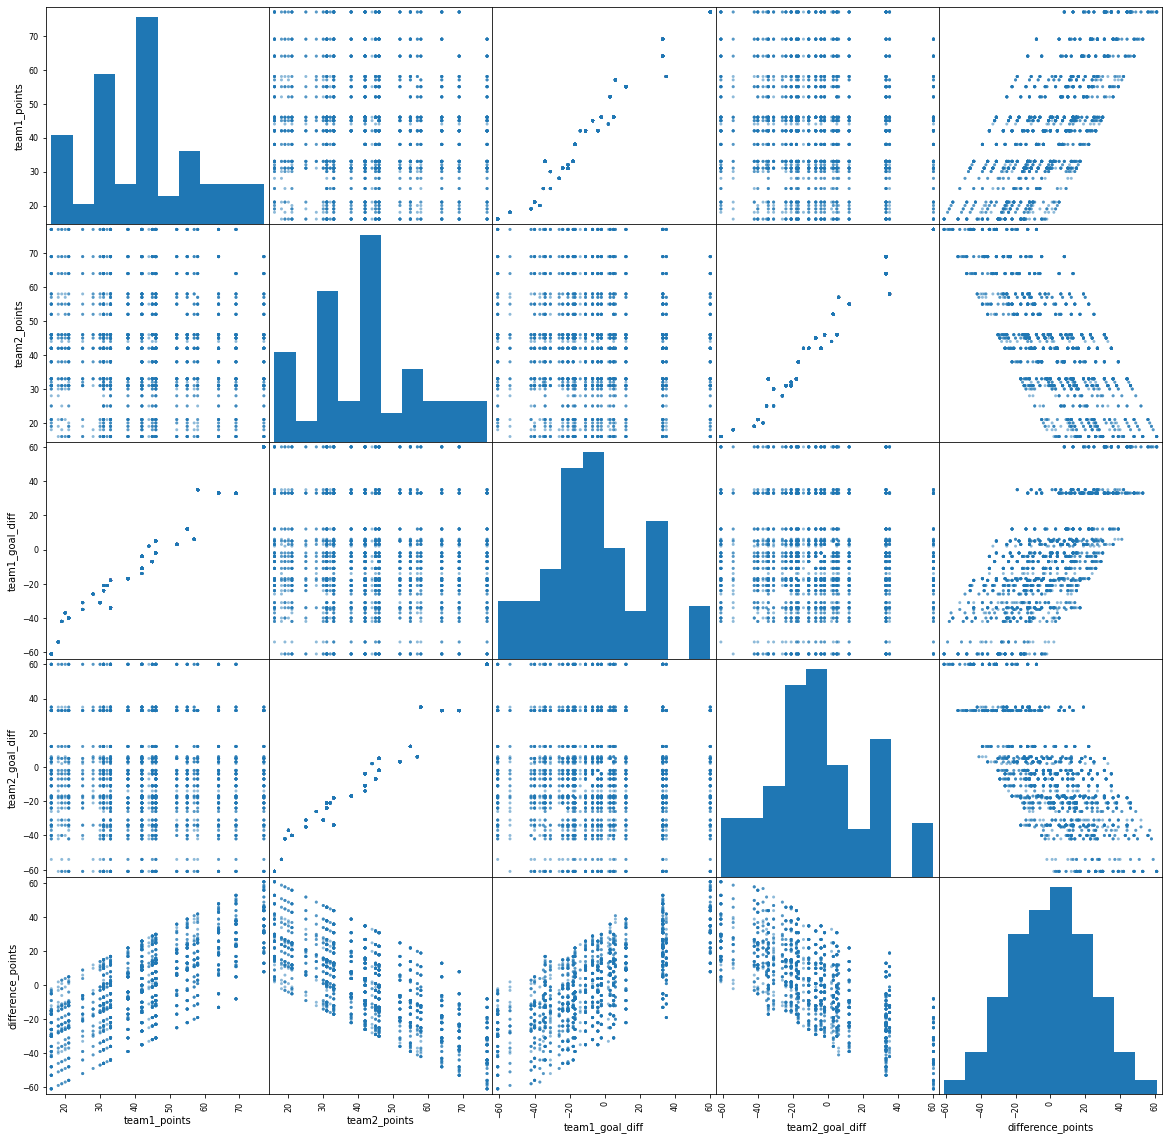

In [39]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

scatter_matrix(df_r[['team1_points','team2_points','team1_goal_diff', 'team2_goal_diff', 'difference_points']], figsize=(20,20))

In [40]:
data = df_r

In [41]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = data.drop(['result'],1)
y_all = data['result']

C:\Users\User\AppData\Local\Temp\ipykernel_50688\132493183.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_all = data.drop(['result'],1)


In [42]:
X_all = X_all.drop(['match_id', 'team1_id', 'team1_name', 'team2_id', 'team2_name', 'season', '2nd_ht_result_team1', '2nd_ht_result_team2', '1st_ht_result_team1', '1st_ht_result_team2', 'weekday', 'gameday'], axis = 1)

In [43]:
transformer = MinMaxScaler().fit(X_all)
X_all_scaled_arr = transformer.transform(X_all)
X_all_scaled = pd.DataFrame(X_all_scaled_arr, columns=X_all.columns)
X_all_scaled

,team1_points,team1_opponent_goals,team1_goals,team1_won_games,team1_lost_games,team1_draw,team1_goal_diff,team2_points,team2_opponent_goals,team2_goals,team2_won_games,team2_lost_games,team2_draw,team2_goal_diff,difference_points
0,0.475410,0.489796,0.402778,0.428571,0.421053,0.6,0.446281,1.000000,0.000000,1.000000,1.000000,0.000000,0.2,1.000000,0.237705
1,0.196721,0.326531,0.027778,0.095238,0.578947,1.0,0.289256,0.639344,0.183673,0.458333,0.571429,0.210526,0.7,0.603306,0.278689
2,0.360656,0.387755,0.194444,0.333333,0.578947,0.5,0.363636,0.491803,0.469388,0.458333,0.476190,0.473684,0.4,0.487603,0.434426
3,0.278689,0.448980,0.222222,0.190476,0.526316,0.9,0.355372,0.032787,0.918367,0.041667,0.000000,0.894737,0.6,0.057851,0.622951
4,0.672131,0.142857,0.347222,0.619048,0.210526,0.6,0.553719,0.786885,0.204082,0.763889,0.761905,0.157895,0.4,0.776860,0.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,0.426230,0.244898,0.277778,0.333333,0.368421,0.9,0.471074,0.426230,0.346939,0.250000,0.428571,0.578947,0.3,0.413223,0.500000
3056,0.049180,0.632653,0.013889,0.000000,0.842105,0.7,0.157025,0.245902,0.408163,0.152778,0.190476,0.631579,0.7,0.330579,0.401639
3057,0.868852,0.306122,0.833333,0.904762,0.210526,0.0,0.776860,0.491803,0.469388,0.458333,0.476190,0.473684,0.4,0.487603,0.688525
3058,0.278689,0.448980,0.222222,0.190476,0.526316,0.9,0.355372,0.491803,0.163265,0.347222,0.476190,0.473684,0.4,0.545455,0.393443


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y_all, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression

# discriminative classifier formally defined by a separating hyperplane
from sklearn.svm import SVC

# produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree
# the outcome (dependent variable) has only a limited number of possible values.
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier

In [46]:
classification = LogisticRegression(random_state=42, solver='saga', multi_class='multinomial').fit(X_train, y_train)

In [47]:
predictions = classification.predict(X_test)
predictions
classification.score(X_test, y_test)


0.5049019607843137

In [48]:
classification2 = SVC(random_state = 42, kernel='rbf')
classification2 = classification2.fit(X_train, y_train)

In [49]:
predictions2 = classification2.predict(X_test)
predictions2
classification2.score(X_test, y_test)

0.5081699346405228

In [50]:
classification3 = xgb.XGBClassifier(seed = 42)
classification3 = classification3.fit(X_train, y_train)

In [51]:
predictions3 = classification3.predict(X_test)
predictions3
classification3.score(X_test, y_test)

0.4624183006535948

In [52]:
clf = RandomForestClassifier(max_depth=10,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 43)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())

0.49060457516339867
0.5196078431372549


0    267
1    174
2    171
Name: result, dtype: int64